## Comparing bulk and pseudobulk expression values

In this notebook, we will calculate the correlation between the pseudobulk and bulk expression values for different tissues from the Tabula Muris (Figure S2) and the correlation between the pseudobulk values of the two protocols (Figure S6).

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42

### Bulk vs pseudobulk (FACS-sorted Smart-seq2 data)

Correlation between the FACS-sorted pseudobulk values and bulk values

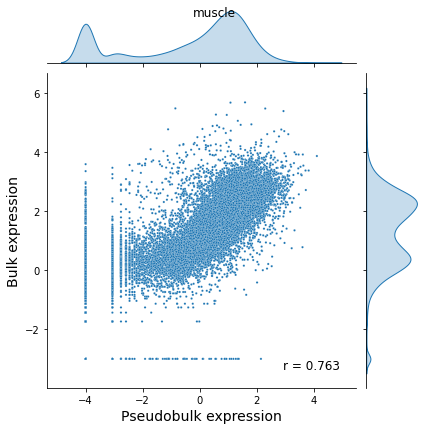

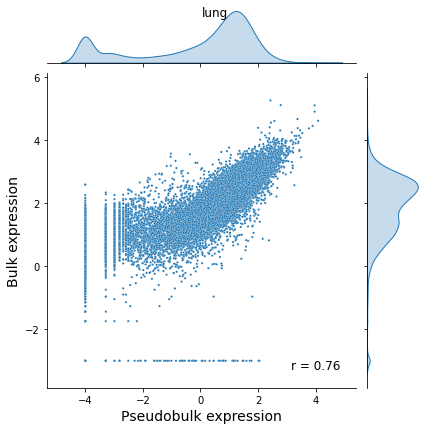

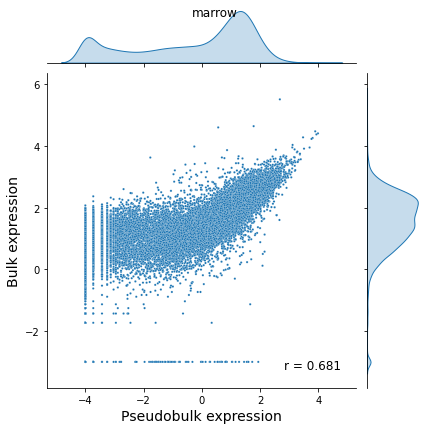

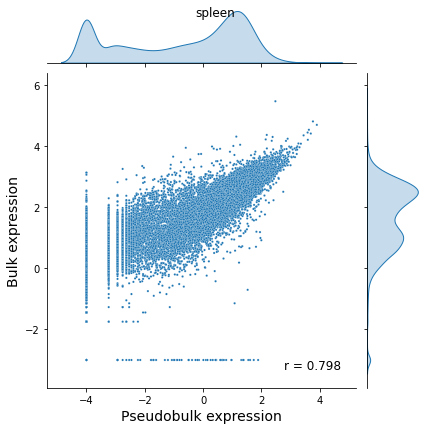

In [2]:
tissues = ['Limb_Muscle', 'Lung', 'Marrow', 'Spleen']
sc_tissues = ['muscle', 'lung', 'marrow', 'spleen']

for i, t in enumerate(sc_tissues):
    
    bulk = pd.read_csv('../../Zenodo/mouse/TM_bulk/bulk_exp.csv', index_col=0)[tissues[i]]

    t_p = t + '_FACS' 
    sc = pd.read_csv('../../Zenodo/mouse/TM_FACS_SM2/' + t + '/pseudobulk.csv',index_col=0)['All']

    pc, _ = pearsonr(sc.values, bulk.values)

    hue_ = np.zeros_like(sc.values)

    h = sns.jointplot(x=sc, y=bulk, hue=hue_, s=5, legend=False)
    h.set_axis_labels('x', 'y', fontsize=14)
    h.ax_joint.set_xlabel('Pseudobulk expression')
    h.ax_joint.set_ylabel('Bulk expression')
    h.fig.suptitle(t)
    h.ax_joint.text(0.95, 0.05, 'r = ' + str(np.round(pc,3)),
        verticalalignment='bottom', horizontalalignment='right',
        transform=h.ax_joint.transAxes, fontsize=12)
    
    plt.show()

### Bulk vs. pseudobulk (10X data)

Correlation between the 10X pseudobulk values and bulk values

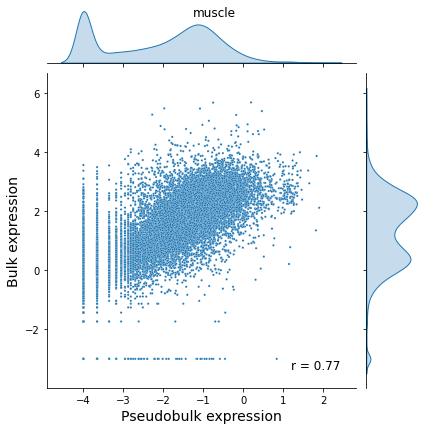

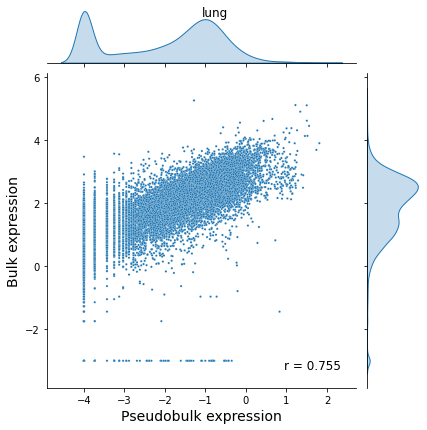

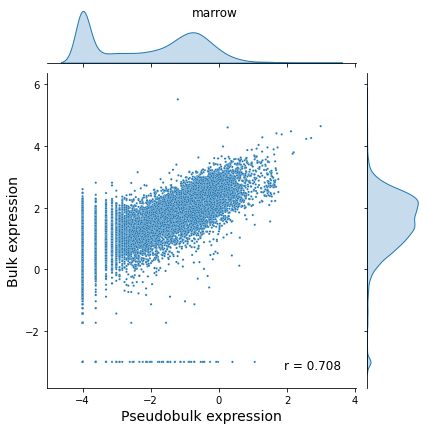

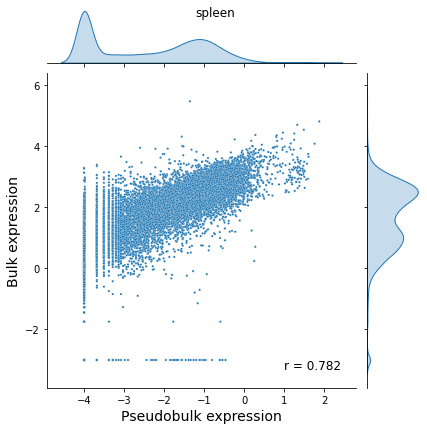

In [3]:
tissues = ['Limb_Muscle', 'Lung', 'Marrow', 'Spleen']
sc_tissues = ['muscle', 'lung', 'marrow', 'spleen']

for i, t in enumerate(sc_tissues):
    
    bulk = pd.read_csv('../../Zenodo/mouse/TM_bulk/bulk_exp.csv', index_col=0)[tissues[i]]

    t_p = t + '_FACS' 
    sc = pd.read_csv('../../Zenodo/mouse/TM_10X/' + t + '/pseudobulk.csv',index_col=0)['All']

    pc, _ = pearsonr(sc.values, bulk.values)

    hue_ = np.zeros_like(sc.values)

    h = sns.jointplot(x=sc, y=bulk, hue=hue_, s=5, legend=False)
    h.set_axis_labels('x', 'y', fontsize=14)
    h.ax_joint.set_xlabel('Pseudobulk expression')
    h.ax_joint.set_ylabel('Bulk expression')
    h.fig.suptitle(t)
    h.ax_joint.text(0.95, 0.05, 'r = ' + str(np.round(pc,3)),
        verticalalignment='bottom', horizontalalignment='right',
        transform=h.ax_joint.transAxes, fontsize=12)
    
    plt.show()

### FACS vs 10X

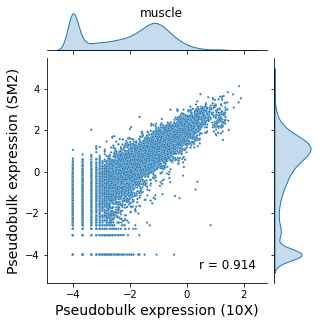

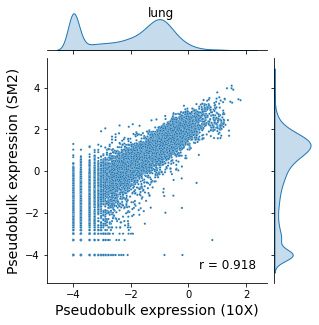

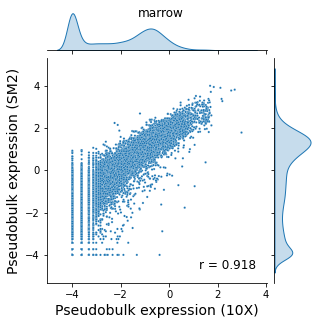

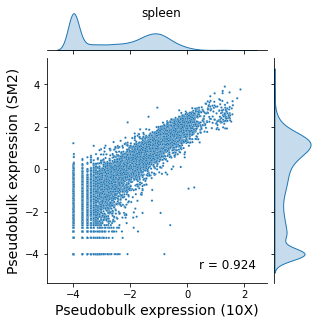

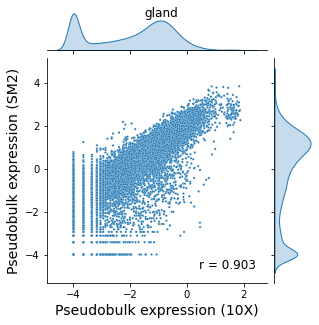

In [4]:
sc_tissues = ['muscle', 'lung', 'marrow', 'spleen', 'gland']

for i, t in enumerate(sc_tissues):
    
    sc_10X = pd.read_csv('../../Zenodo/mouse/TM_10X/' + t + '/pseudobulk.csv',index_col=0)['All']
    sc_FACS = pd.read_csv('../../Zenodo/mouse/TM_FACS_SM2/' + t + '/pseudobulk.csv',index_col=0)['All']

    pc, _ = pearsonr(sc_10X.values, sc_FACS.values)

    hue_ = np.zeros_like(sc_10X.values)
    
    h = sns.jointplot(x=sc_10X, y=sc_FACS, hue=hue_, s=5, legend=False, rasterized=True, height=4.5)
    h.set_axis_labels('x', 'y', fontsize=14)
    h.ax_joint.set_xlabel('Pseudobulk expression (10X)')
    h.ax_joint.set_ylabel('Pseudobulk expression (SM2)')
    h.fig.suptitle(t)
    h.ax_joint.text(0.95, 0.05, 'r = ' + str(np.round(pc,3)),
        verticalalignment='bottom', horizontalalignment='right',
        transform=h.ax_joint.transAxes, fontsize=12)
    plt.show()
    